In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from scipy import stats
from tqdm import tqdm
from xgboost import XGBRegressor

In [25]:
df = pd.read_csv('../data/train.csv')
df.drop('id', axis=1, inplace=True)
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [26]:
df.shape

(1117957, 21)

In [27]:
# дубликатов нет
df.drop_duplicates()
df.shape

(1117957, 21)

In [28]:
print(df.columns)

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


In [29]:
# пропусков нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [30]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


/Users/elizabeth/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


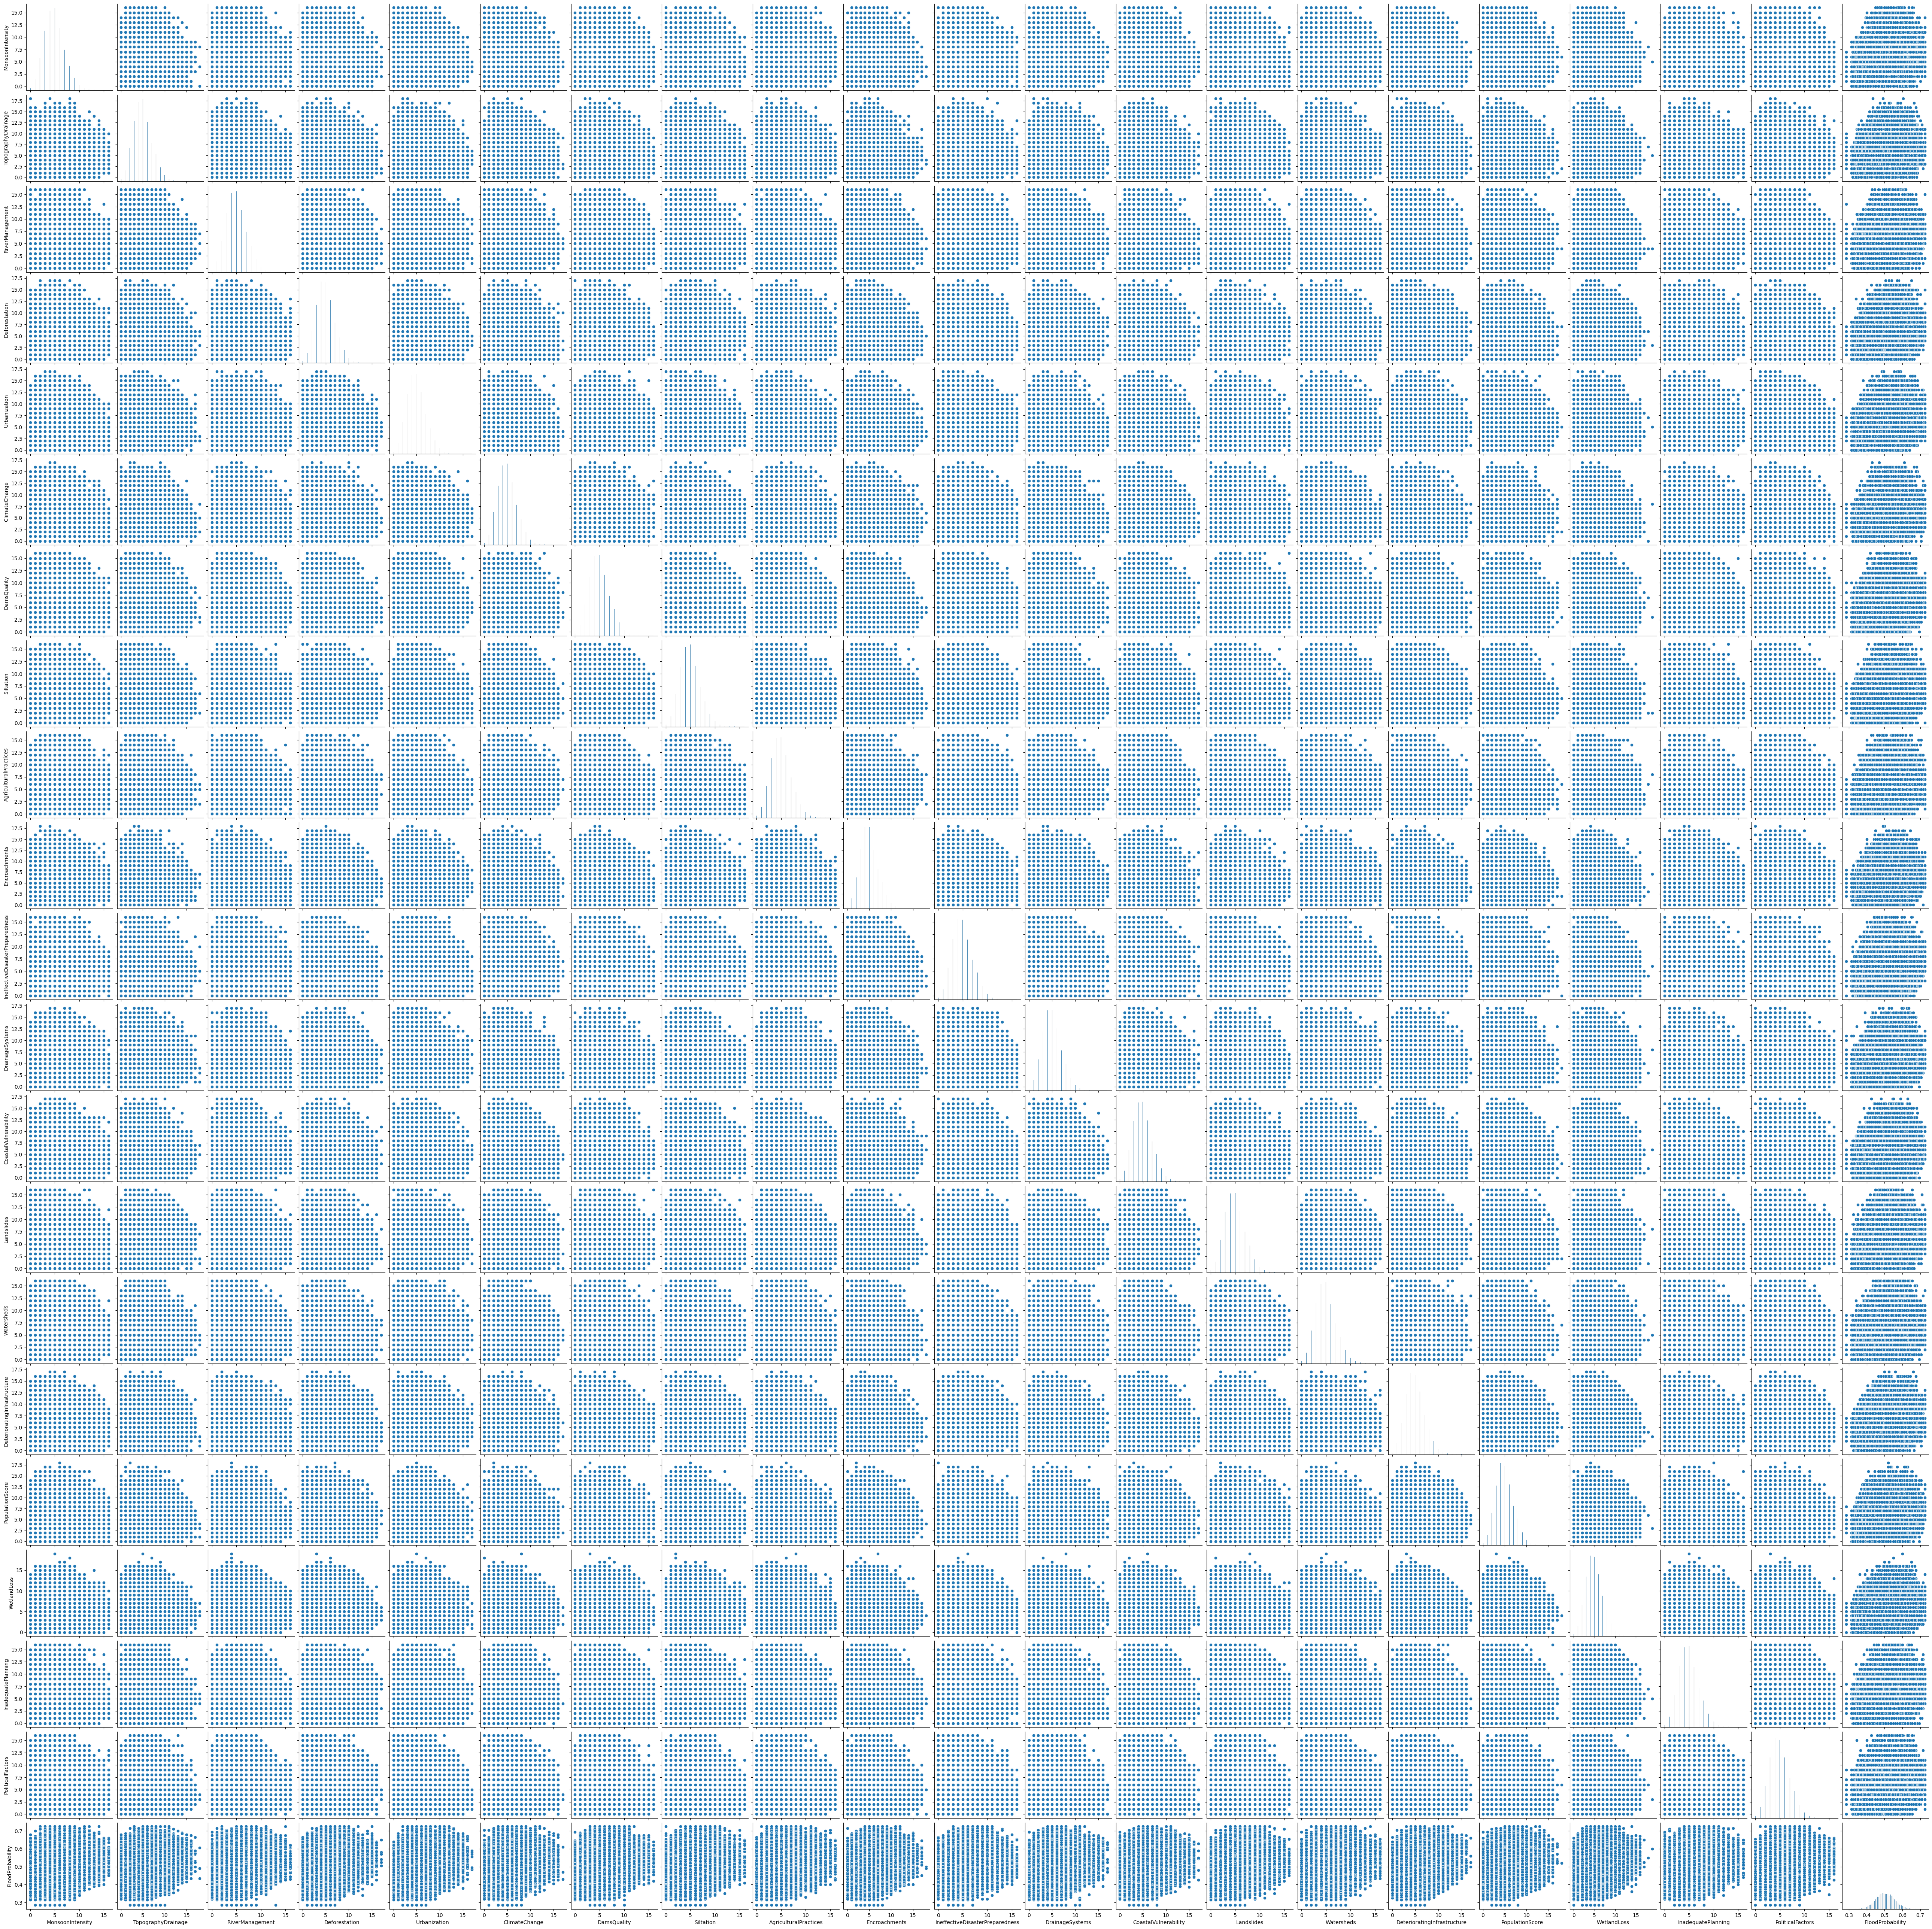

In [31]:
# не пытаемся вглядеться в графики, просто оцениваем, что явных линейных зависимостей нет
numeric_columns = df.columns
sns.pairplot(df[numeric_columns])
plt.show()

<Axes: >

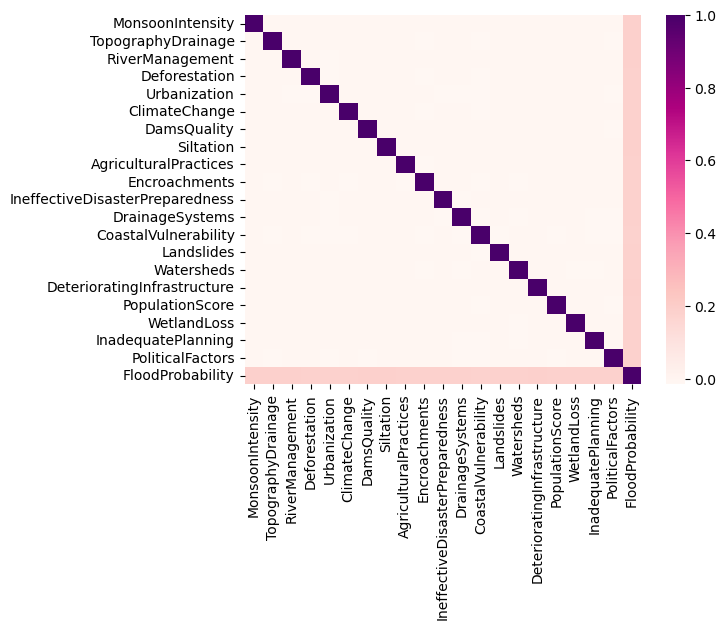

In [32]:
# Видим, что корреляция у всех фичей с таргетом +- одинаковая, т.е нельзя выделить наиболее важные фичи
# Также видим, что нет линейно зависимых фичей, так что дропать ничего не будем
sns.heatmap(df.corr(), cmap='RdPu')

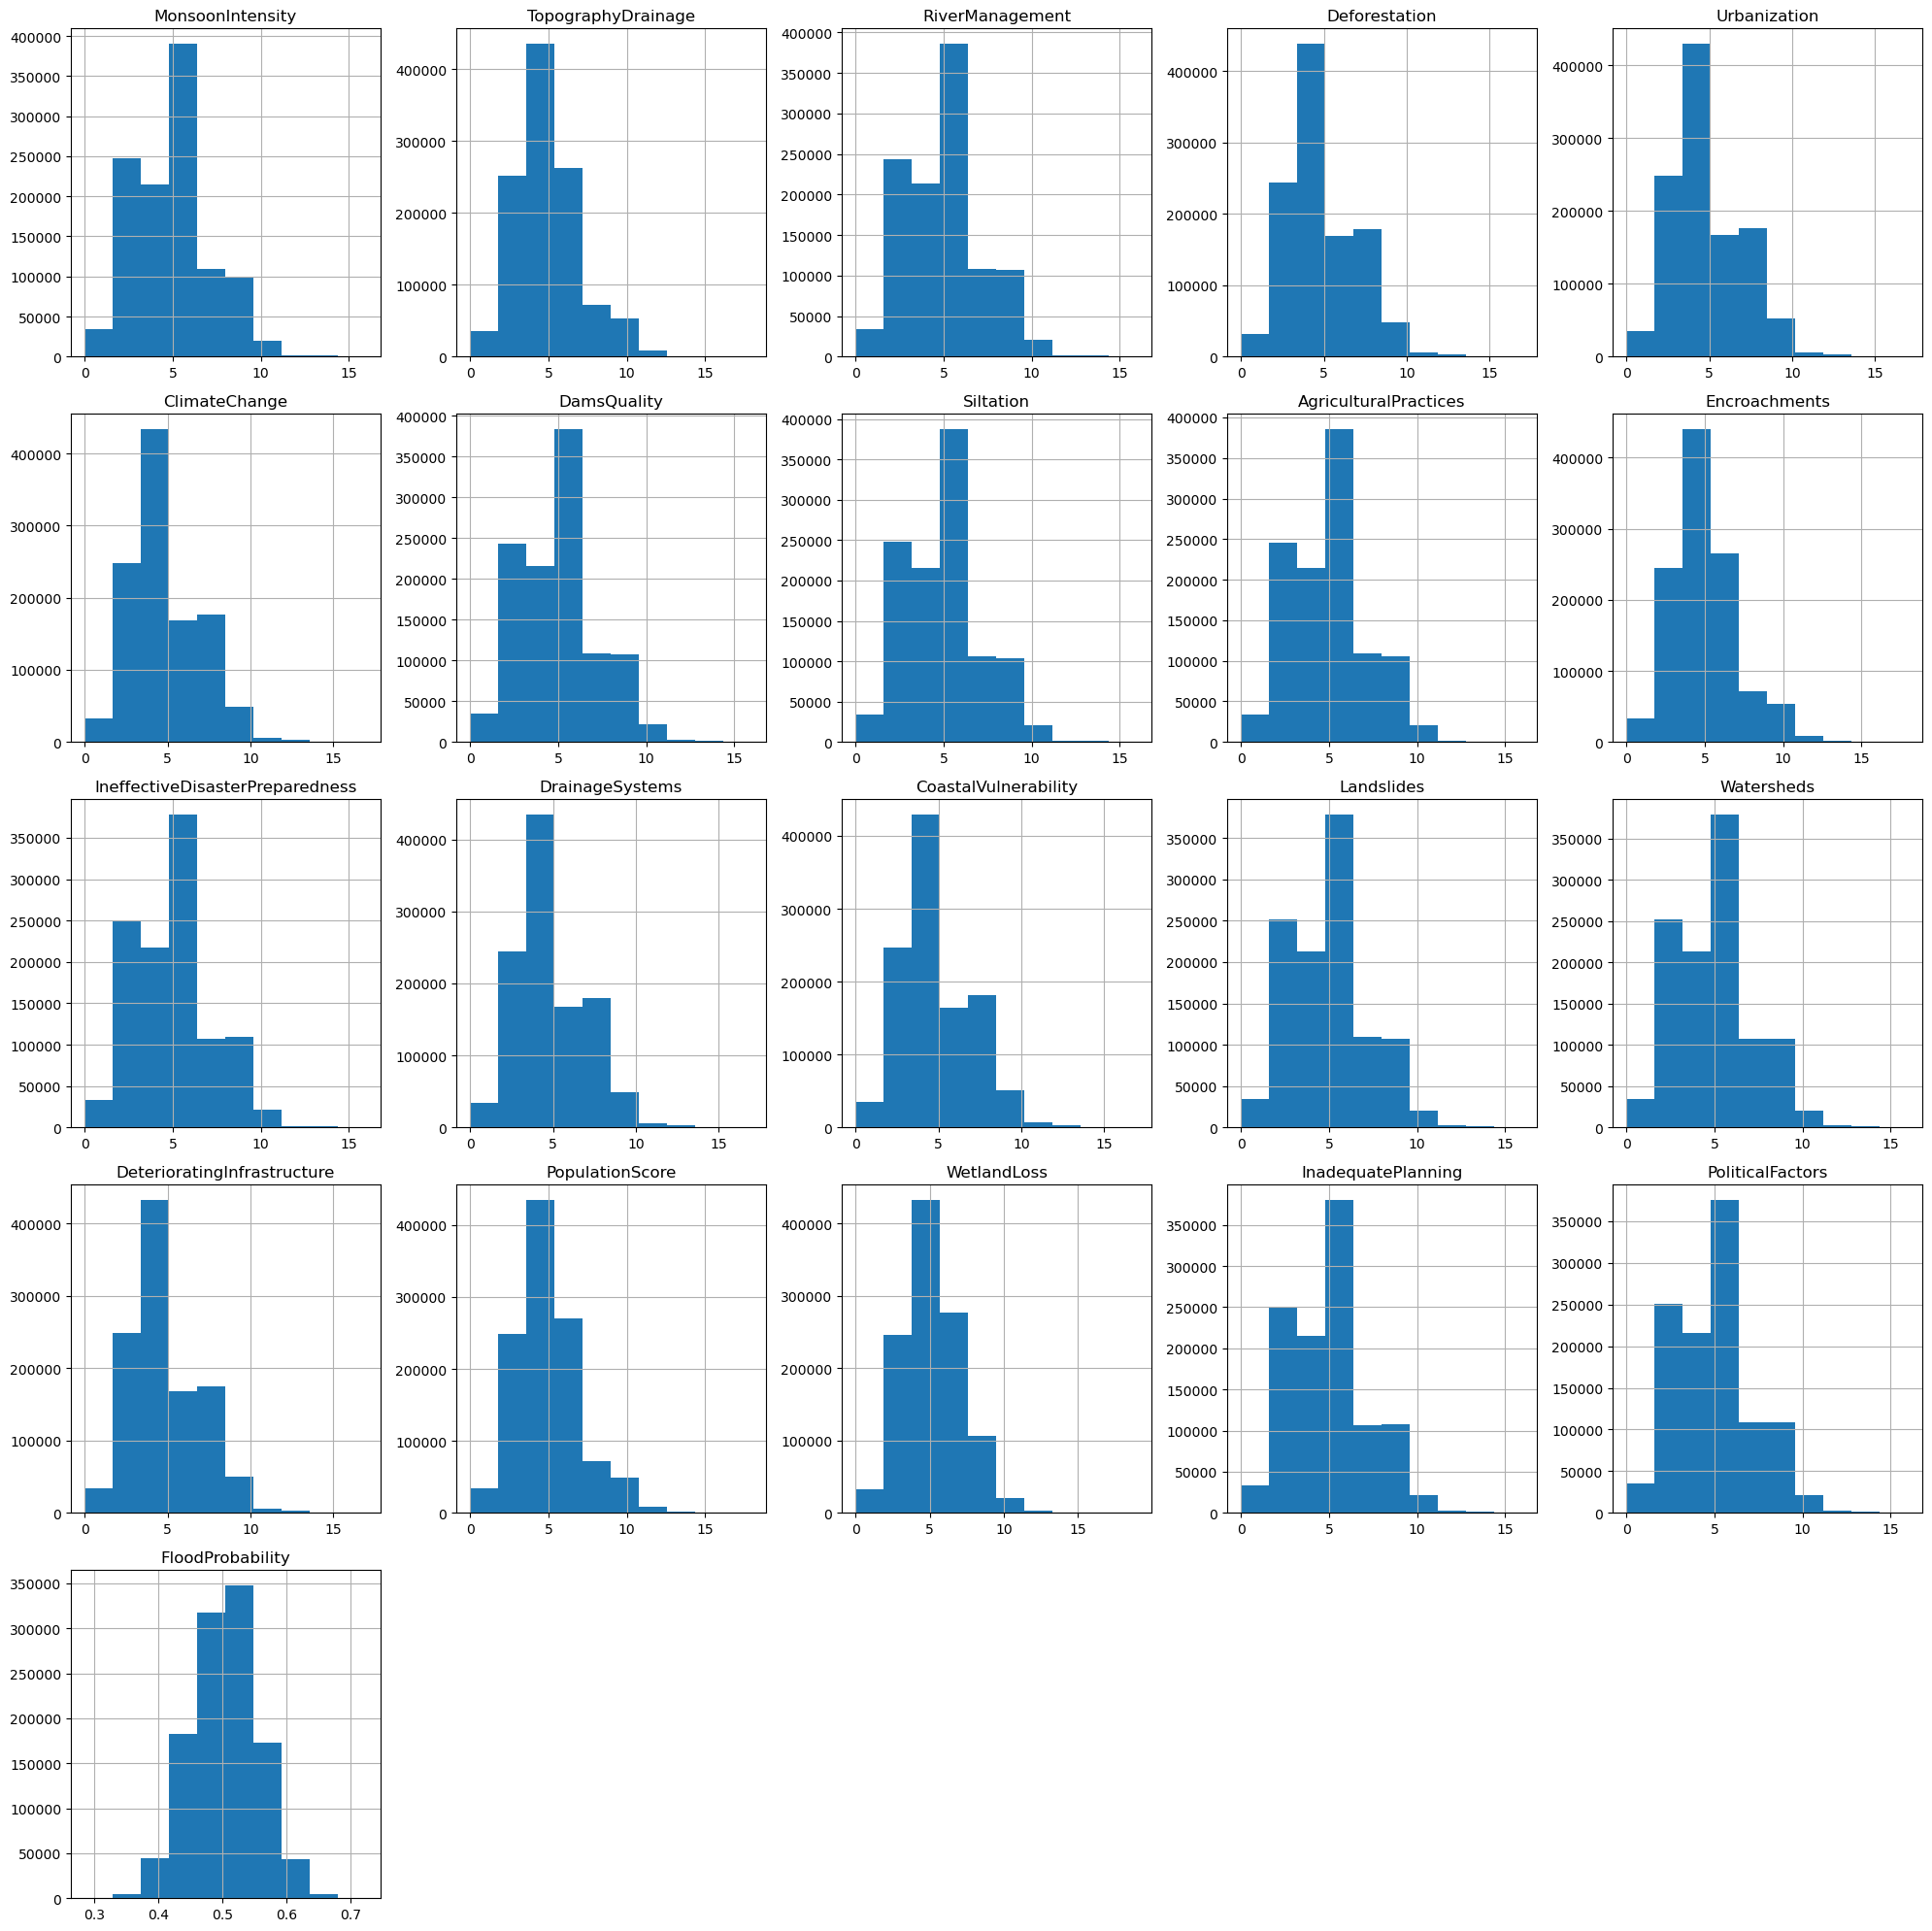

In [33]:
df.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

In [34]:
y = df[['FloodProbability']]
X = df.drop(columns=['FloodProbability'], axis = 1)

In [35]:
X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5


In [36]:
y.head()

,FloodProbability
0,0.445
1,0.450
2,0.530
3,0.535
4,0.415


In [37]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

## Множественная линейная регрессия

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)

n = len(y_test)
p = X_test.shape[1]

r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'R2: {r2}')
print(f'R2 adj: {r2_adj}')

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('True')
plt.ylabel('Predict')
plt.title('True vs Predict')
plt.show()

## XGBRegressor

In [ ]:
param_grid = {
    'n_estimators': [100, 500, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
}

In [ ]:
def batch_generator(X, y, batch_size=10000):
    num_samples = X.shape[0]
    num_batches = num_samples // batch_size

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        yield X[start_idx:end_idx], y[start_idx:end_idx]

    if num_samples % batch_size != 0:
        yield X[num_batches * batch_size:], y[num_batches * batch_size:]

In [ ]:
xgb_model = XGBRegressor(objective='reg:squarederror', early_stopping_rounds=50, verbosity=0, random_state=42)

best_params = None
best_score = -np.inf

for params in tqdm(ParameterGrid(param_grid), desc='Grid Search'):
    xgb_model.set_params(**params)
    scores = []

    num_batches = len(list(batch_generator(X_train, y_train)))

    for i, (X_batch, y_batch) in tqdm(enumerate(batch_generator(X_train, y_train)),
                                      desc='Batch generation',
                                      total=num_batches):
        xgb_model.fit(X_batch, y_batch, eval_set=[(X_test, y_test)], verbose=False)
        y_pred = xgb_model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)

    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_params = params

## Catboost

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error

model = CatBoostRegressor(random_seed=42, verbose=0)
param_grid = {
    'iterations': [50, 100, 150], # Пробуем разные количества деревьев
    'learning_rate': [0.01, 0.1, 0.2], # Пробуем разные скорости обучения
    'depth': [4, 6, 8] # Пробуем разные глубины дерева
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'depth': 8, 'iterations': 150, 'learning_rate': 0.2}


In [41]:
best_catboost = grid_search.best_estimator_
best_catboost.fit(X_train, y_train)  # обучаем на части тренировочной выборки

In [42]:
preds = best_catboost.predict(X_test)
r2_score(y_test, preds)

0.8443283410159401

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train_subset = X_train.sample(frac=0.1, random_state=42)
y_train_subset = y_train.loc[X_train_subset.index]

In [47]:
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train_subset, y_train_subset.values.ravel())

RandomForestRegressor(n_estimators=50, random_state=42)

In [49]:
X_test_subset = X_test.sample(frac=0.1, random_state=42)
rf_pred = rf.predict(X_test)

In [50]:
y_test_subset = y_test.loc[X_test_subset.index]
r2_score(y_test, rf_pred)

0.6055766439057508

Попробуем улучшить резуьтат RandomForest

In [54]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid)

grid_search.fit(X_train_subset, y_train_subset.values.ravel())

best_rf = grid_search.best_estimator_

KeyboardInterrupt: 

^
|
Модель обучалась очень долго, и не смогла дообучиться, тк датасет очень большой и даже на 10% от датасета все равно не хватает мощности ноута

In [57]:
X_train_subset1 = X_train.sample(frac=0.1, random_state=123)
y_train_subset1 = y_train.loc[X_train_subset.index]
rf1 = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5)
rf1.fit(X_train_subset1, y_train_subset1.values.ravel())

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200)

In [58]:
X_test_subset1 = X_test.sample(frac=0.1, random_state=123)
rf1_pred = rf.predict(X_test)
y_test_subset1 = y_test.loc[X_test_subset1.index]
r2_score(y_test, rf1_pred)

0.6055766439057508

## SVR

In [62]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_subset, y_train_subset.values.ravel())

SVR()

In [64]:
y_pred_svr = svr_model.predict(X_test_subset)
r2_score(y_test_subset, y_pred_svr)

0.666909339458901

Метод опорных векторов на 10% от датасета обучился довольно быстро и дал результат лучше, чем RF
Метод опорных векторов актуален для обучения на данных, которые не имеют линейных зависимостей (у нас ровно эта ситуация), но результат не слишком впечетляющий